# 평가(Evaluation)

## 정확도(Accuracy)

- 정확도 = 예측결과가 동일한 데이터 건수/전체 예측 데이터 건수

- scikit learn 의 BaseEstimator클래스를 상속받으면
  Customized 형태의 Estimator를 개발자가 생성가능
  
- fit() 메서드는 아무것도 수행하지 않음.
- predict() 메서드는 단순히 피처가 1이면 0 그렇치 않으면 1로 예측

In [2]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    #fit 메서드는 아무것도 학습하지 않음
    def fit(self,X,y=None):
        pass
    #predict()메서드는 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측
    def predict(self,X):
        pred=np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i]=0
            else :
                pred[i]=1
        return pred

In [3]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [4]:
# MyDummyClassfier로 학습/예측/평가 하기

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 타이타닉 데이터 로딩 및 가공/ 데이터 분리
titanic_df = pd.read_csv('titanic_train.csv')
y_df = titanic_df['Survived']
X_df = titanic_df.drop('Survived',axis=1)
X_df = transform_features(X_df)
X_train,X_test,y_train,y_test=train_test_split(X_df,y_df,test_size=0.2, random_state=0)

# DummyClassfier로 학습/예측/평가
Dummyclf = MyDummyClassifier()
Dummyclf.fit(X_train,y_train)
pred = Dummyclf.predict(X_test)

print('MyDummyClassifier 정확도 :{0:4f}'.format(accuracy_score(y_test,pred)))

MyDummyClassifier 정확도 :0.787709


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7933
RandomForestClassifier 정확도:0.8212
LogisticRegression 정확도: 0.8101


C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass

    #입력값으로 들어오는 x데이터 세트의 크기만큼 모두 0으로 만들어서 반환
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

# 내장 데이터 세트 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()


# 불균형한 레이블 분포도 확인
print('레이블 데이터 세트 크기 : ', digits.data.shape)
print('테스트 세트 레이블 0과 1의 분포도: \n',digits.target.shape)

레이블 데이터 세트 크기 :  (1797, 64)
테스트 세트 레이블 0과 1의 분포도: 
 (1797,)


In [7]:
digits.target == 7

array([False, False, False, ..., False, False, False])

In [8]:
# digits 번호가 7번이면 True, 이를 astype(int) 1로 반환, 7이 아니면 false, 0으로 반환
y = (digits.target==7).astype(int)
X_train,X_test,y_train,y_test=train_test_split(digits.data,y,random_state=11)

In [9]:
# 불균형한 레이블 데이터 분포확인
print('레이블 테스트 세트 크기 : ',y_test.shape)
print('테스트 세트 레이블 0과 1의 분포:\n',pd.Series(y_test).value_counts())
# DummyCalssifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train,y_train)
pred = fakeclf.predict(X_test)
print('모든 예측을 0으로 한 정확도는 : {:.4f}'.format(accuracy_score(y_test,pred)))

레이블 테스트 세트 크기 :  (450,)
테스트 세트 레이블 0과 1의 분포:
 0    405
1     45
dtype: int64
모든 예측을 0으로 한 정확도는 : 0.9000


# 오차행렬(confusion matrix) 

- 얼마나 헷갈리고 있는지 보여주는 지표
    - TN(True Negative) : 실제값이 Negative인 값을 Negative로 예측(0,0)
    - FN(False Negative) : Negative로 예측 했는데 실제값은 Positive (1,0)
    - FP(False Positive) : Positive로 예측했는데 실제값은 Negative(0,1)
    - TP(True Positive) : 실제값이 Positive인 값을 Positive 로 예측(1,1)
    
    
- 불균형한 데이터에서는 정확도 보다 정밀도, 재현율이 더 선호됨

- 정확도(Accuracy) : (TN+TP)/(TN+FP+FN+TP)
    
- 정밀도(Precision) : (TP)/(TP+FP) = Positive로 예측한 대상 중에 실제값이 Positive인 값의 비율
  
  = 양성예측도
  
    
- 재현율(Recall) : (TP)/(TP+FN) = 실제값이 Positive인 값중에 예측과 실제값이 Positive인 데이터 비율
  
  = 민감도(Sensitivity) = TPR(True Positive Rate)

In [11]:
# MyFakeClassifier 의 예측결과 fpred를 오차행렬를 이용한 배열로 출력

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,pred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

## 정밀도(Precision)과 재현율(Recall)

-MyFakeClassfier 의 예측결과로 정밀도와 재현율 측정

- 오차행렬, 정확도, 정밀도, 재현율을 한번에 계산하는 함수 생성
        get_clf_val()함수

In [15]:
from sklearn.metrics import accuracy_score, precision_score,\
recall_score, confusion_matrix,f1_score

def get_clf_val(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    
    print('오차행렬:\n', confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.format(accuracy,precision,recall))

### 원본데이터 로드 후 LogisticRegression() 의 정확도, 정밀도, 재현율 확인

In [16]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#원본 데이터 재로딩, 가공, train, test 분리
titanic_df = pd.read_csv('titanic_train.csv')
y = titanic_df['Survived']
X = titanic_df.drop('Survived',axis = 1)
X = transform_features(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
get_clf_val(y_test,pred)

오차행렬:
 [[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869


C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Precision/Recall Trade-off

- Trade-off : 정밀도, 재현율이 특별히 강조되야 할 경우 임계값(Threshold)을
              조정해 정밀도,재현율 수치를 높일 수 있음
              
              정밀도, 재현율 중 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉬움
              이를 Trade-off 라고 함

- 일반적인 이진분류 : 임계값을 0.5 = 50% 기준 설정

    - 기준값보다 확률이 크면 Positive 작으면, Negative로 결정

- predict_proba() 메서드 : 학습 완료 된 Classfier 에서 호출 가능
    - test 피처 데이터 세트 : 파라미터로 입력 해주면 테스트 피처 레코드의 개별 클래스 예측 확률 반환

- 반환값  : ndarray m x n ( m : 입력값의 레코드 수, n : 클래스 값 유형)
    - ex) 입력 테스트 데이터 표본개수가 100개, 예측 클래스 값 유형 2개(이진분류) 반환값 = 100x2 ndarray
    - 첫번째 컬0럼 : 0 Negative 확률, 두번째 컬럼 : 1 Positive 확률

In [17]:
pred_proba = lr.predict_proba(X_test)
pred = lr.predict(X_test)
print('pred_proba 결과 shape: ',pred_proba.shape)
print('pred_preba array 에서 앞 3개만 추출 : \n',pred_proba[:3])

# 예측확률 array와 예측 결과값 array를 병합(concatenate)해 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)],axis=1)
print('두개의 class 중 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])

pred_proba 결과 shape:  (179, 2)
pred_preba array 에서 앞 3개만 추출 : 
 [[0.46196064 0.53803936]
 [0.87860795 0.12139205]
 [0.87714215 0.12285785]]
두개의 class 중 더 큰 확률을 클래스 값으로 예측 
 [[0.46196064 0.53803936 1.        ]
 [0.87860795 0.12139205 0.        ]
 [0.87714215 0.12285785 0.        ]]


    ## Binarizer ##

- threshold 값보다 작으면 0, 크면 1을 반환
- Binarizer.fit_trasform() 활용

In [18]:
from sklearn.preprocessing import Binarizer

x = [[1,8,4],
     [2,0,9],
     [0,8.1,1.5]]

binarizer = Binarizer(threshold=5)
print(binarizer.fit_transform(x))

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [19]:
# Binarizer에 git_clf_eval()함수 적용
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값, 분류 결정 임계값임
custom_threshold = 0.4

#predict_proba() 반환값의 두번째 칼럼(Positive)클래스 칼럼 하나만 Binarizer 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_pred = binarizer.transform(pred_proba_1)

get_clf_val(y_test,custom_pred)

오차행렬:
 [[98 20]
 [10 51]]
정확도 : 0.8324, 정밀도 : 0.7183, 재현율 : 0.8361


In [20]:
## 여러개의 분류 결정 임계값 변경으로 Binarizer예측값 변환

thresholds = [0.40,0.45,0.5,0.55,0.60]

def get_threshold(y_test,pred_proba2,threshold):
    # thresholds list 값을 차례로 iteration 하면서 Evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba2)
        custom_predict=binarizer.transform(pred_proba2)
        print('임계값: ',custom_threshold)
        get_clf_val(y_test,custom_predict)

get_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임계값:  0.4
오차행렬:
 [[98 20]
 [10 51]]
정확도 : 0.8324, 정밀도 : 0.7183, 재현율 : 0.8361
임계값:  0.45
오차행렬:
 [[103  15]
 [ 12  49]]
정확도 : 0.8492, 정밀도 : 0.7656, 재현율 : 0.8033
임계값:  0.5
오차행렬:
 [[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869
임계값:  0.55
오차행렬:
 [[109   9]
 [ 15  46]]
정확도 : 0.8659, 정밀도 : 0.8364, 재현율 : 0.7541
임계값:  0.6
오차행렬:
 [[112   6]
 [ 16  45]]
정확도 : 0.8771, 정밀도 : 0.8824, 재현율 : 0.7377


###### precision_recall_curve() #######

입력 파라미터 

- y_true : 실제 클래스값 배열
- probas_pred : Positive 칼럼의 예측 확률 배열

반환값 : 정밀도, 재현율


In [21]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_l1 = lr_clf.predict_proba(X_test)[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_l1 )
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

print("thresholds 5 sample:", thresholds[:5])
print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:", recalls[:5])

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (140,)
반환된 precisions 배열의 Shape: (141,)
반환된 recalls 배열의 Shape: (141,)
thresholds 5 sample: [0.09858504 0.09859031 0.09864942 0.09884408 0.10337224]
precisions 5 sample: [0.3961039  0.39215686 0.39473684 0.39735099 0.39333333]
recalls 5 sample: [1.         0.98360656 0.98360656 0.98360656 0.96721311]
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값:  [0.1  0.12 0.14 0.19 0.29 0.42 0.59 0.72 0.87 0.95]
샘플 임계값별 정밀도:  [0.396 0.45  0.478 0.556 0.659 0.716 0.885 0.944 0.952 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.885 0.787 0.754 0.557 0.328 0.098]


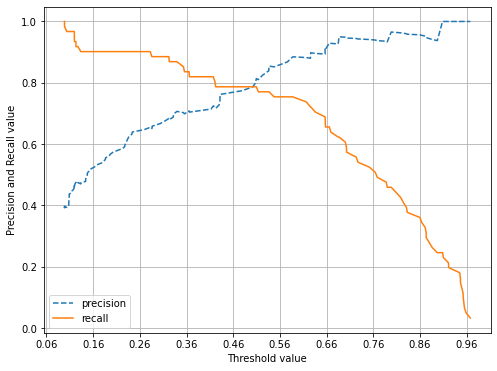

In [22]:
## 정밀도와 재현율 시각화

import matplotlib.pyplot as plt
import matplotlib.ticker as tk
%matplotlib inline

def prc_plot(y_test,pred_proba_l1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_l1)
    
    #X축 thresholds, y축 정밀도, 재현율 : 정밀도는 점선
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    #threshold 값 X축 scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    # X축, y축 label 과 legend, grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
prc_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

## F1 Score

- 정밀도, 재현율의 수치가 적절하게 조합, 분류의 종합적인 성능 평가에 사용

- 2(precision*recall/precision+recall)

In [27]:
from sklearn.metrics import accuracy_score, precision_score,\
recall_score, confusion_matrix,f1_score

def get_clf_val(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    
    print('오차행렬:\n', confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, f1_score:{3:.4f}'.format(accuracy,precision,recall,f1))
    
thresholds = [0.40,0.45,0.5,0.55,0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_threshold(y_test,pred_proba[:,1].reshape(-1,1), thresholds)

임계값:  0.4
오차행렬:
 [[98 20]
 [11 50]]
정확도 : 0.8268, 정밀도 : 0.7143, 재현율 : 0.8197, f1_score:0.7634
임계값:  0.45
오차행렬:
 [[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869, f1_score:0.7805
임계값:  0.5
오차행렬:
 [[105  13]
 [ 13  48]]
정확도 : 0.8547, 정밀도 : 0.7869, 재현율 : 0.7869, f1_score:0.7869
임계값:  0.55
오차행렬:
 [[111   7]
 [ 15  46]]
정확도 : 0.8771, 정밀도 : 0.8679, 재현율 : 0.7541, f1_score:0.8070
임계값:  0.6
오차행렬:
 [[112   6]
 [ 16  45]]
정확도 : 0.8771, 정밀도 : 0.8824, 재현율 : 0.7377, f1_score:0.8036


## ROC Curve와 AUC

ROC_CURVE() :
    - 입력값 : y_true, y_score
    - 반환값 : FPR, TPR, thresholds

- ROC 곡선과 AUC스코어는 이진분류의 예측 성능 측정에서 활용

- ROC곡선(Receiver Operation Characteristic Curve) = 수신자 판단 곡선 
    - 일반적으로 의학에서 많이 사용
    - FPR(X)이 변할 때 TPR(Y)이 어떻게 변하는지 나타내는 곡선

- TPR(True Positive Rate) : 재현율=민감도 TP/(TP+TN)
- FPR(False Positive Rate) : 특이성 FP/(FP+TN)
    - = 1-TNR = 1-특이성
- ROC곡선이 직선에 가까울수록 성능이 떨어지고 멀어질수록 성능이 뛰어남

In [31]:
from sklearn.metrics import roc_curve
# 레이블 값이 1일때 예측 확률
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test,pred_proba_class1)
# 반환된 임곗값 배열에서 임계값을 5step으로 데이터 추출
#thresholds[0]은 max(예측확률)+1로 임의 설정, 이를 제외하기위해 np.arange 1부터
thr_index=np.arange(1,thresholds.shape[0],5)
print('임곗값 배열의 인덱스 :',thr_index)
print('샘플 index로 추출한 임곗값 : ', np.round(thresholds[thr_index],2))

#5 step 단위로 추출된 임계값에 따른 FPR,TPR 값
print('샘플 임곗값별 FPR : ',np.round(fpr[thr_index],3))
print('샘플 임곗값별 TPR : ',np.round(tpr[thr_index],3))

임곗값 배열의 인덱스 : [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값 :  [0.97 0.69 0.66 0.54 0.37 0.32 0.15 0.12 0.11 0.1 ]
샘플 임곗값별 FPR :  [0.    0.017 0.042 0.068 0.178 0.212 0.458 0.534 0.653 0.771]
샘플 임곗값별 TPR :  [0.033 0.623 0.689 0.77  0.82  0.885 0.902 0.934 0.967 0.984]


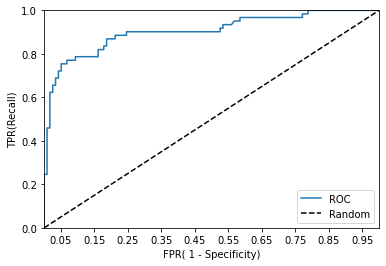

In [33]:
def roc_curve_plot(y_test,pred_probal1):
    #tpr,fpr 반환 받음
    tpr,fpr,thresholds = roc_curve(y_test,pred_proba_l1)
    
    #ROC Curve를  plot 곡선으로 그림
    plt.plot(tpr,fpr,label='ROC')
    #가운데 대각선 직선
    plt.plot([0,1],[0,1],'k--',label='Random')
    
    #FPR X축의 Scale을 0.1단위로 변경, X,Y 축명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Specificity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [38]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test,pred_proba)
print('roc_auc값:{0:4f}'.format(roc_score))

roc_auc값:0.904210


In [43]:
def get_clf_val(y_test,pred=None,pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test,pred_proba)
    
    print('오차행렬:\n',confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

<function __main__.get_clf_val(y_test, pred=None, pred_proba=None)>